# Structured Coalescent

# 0) Import

In [1]:
from Structured_Coalescent_Otto import *

___

# 1) Stationary distribution

Make the stationary distribution, according to

$$\pi P=P $$

where $P$ is the transition matrix of the unequal recombination process

In [ ]:
E = 20
Stat_distr = make_stat_distr(E)

Plot

In [ ]:
%matplotlib notebook

n_max = n_max_UE(E)
fig = plt.figure()
ax = fig.gca(projection='3d')
X = range(1,n_max)
Y = range(1,n_max)
X, Y = np.meshgrid(X, Y)

Z = Stat_distr[coef(X,Y,n_max)]



surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# 2) Mixing Time

The distance function $d$ is defined via the total variation $\| \cdot \|_{TV}$, i.e.

$$ d(t) = \max\limits_x \|P^t_x - \pi \|_{TV} $$

The mixing time $t_{mix}$ is defined as the time, at which $d(t)$ is less than $\frac{1}{4}$, i.e.

$$ t_{mix} = \min \{t: d(t) < \frac{1}{4} \} $$

In [10]:
E_vec = [5,10,15]

t_mix = [Mixing_time(E) for E in E_vec]

Calculating P^12 for E=15


In [ ]:
%matplotlib inline
plt.scatter(E_vec,t_mix)

regression_model = LinearRegression().fit(np.array(E_vec).reshape((-1, 1)), np.array(t_mix))

x = np.linspace(0,35,100).reshape((-1,1))
y = regression_model.predict(x)

plt.plot(x,y)

print(f'Regression function: t_mix(E) = {regression_model.coef_} E + {regression_model.intercept_}')

# 3) Verfication

### 3.1) Symmetric Island

![title](SymIsland.png)

In [ ]:
states = states_Sym()
P = make_P_Sym()
pop_distr = pop_distr_Sym()

In [ ]:
m = 0.001
N = 1000

M = m*P
pop_size = np.array(N*pop_distr)
coalescence = 1/pop_size

smin = 1e-8
smax = 1e-6
srange = np.arange(smin,smax,(smax-smin)/10)
srange = np.append(srange,np.arange(smax,1e-2,(1e-2-smax)/20))

In [ ]:
MSPRIME_data = make_ctime_msprime(states,0.5*M,0.5*pop_size,iterations=500,rep=np.inf,save_as_file=False)
LINEQ_data = make_ctime_lineq(0.5*M,coalescence,srange)

Plot

In [ ]:
for i in range(1,len(states)**2):
    plt.plot(LINEQ_data[:,0],LINEQ_data[:,i])

for i in range(1,len(MSPRIME_data)):
    plt.plot(srange,emp_laplace(srange,MSPRIME_data[i][1]),'bo')

In [ ]:
plt.hist(np.array(E_Var_lineq(LINEQ_data))[:,1],label='linear equation',alpha=0.5)
plt.hist(np.array(E_Var_msprime(MSPRIME_data))[:,1],label='empirical',alpha=0.5)
plt.legend()

### 3.2) Continental Island

![title](Continental_Island.png)

In [ ]:
states = states_Cont()
P = make_P_Cont(states)
pop_distr = pop_distr_Cont()

In [ ]:
m = 0.001
N = 1000

M = m*P
pop_size = np.array(N*pop_distr)
coalescence = 1/pop_size

smin = 1e-8
smax = 1e-6
srange = np.arange(smin,smax,(smax-smin)/10)
srange = np.append(srange,np.arange(smax,1e-2,(1e-2-smax)/20))

In [ ]:
MSPRIME_data = make_ctime_msprime(states,0.5*M,0.5*pop_size,iterations=500,rep=np.inf,save_as_file=False)
LINEQ_data = make_ctime_lineq(0.5*M,coalescence,srange)

Plot

In [ ]:
for i in range(1,len(states)**2):
    plt.plot(LINEQ_data[:,0],LINEQ_data[:,i])

for i in range(1,len(MSPRIME_data)):
    plt.plot(srange,emp_laplace(srange,MSPRIME_data[i][1]),'bo')

In [ ]:
plt.hist(np.array(E_Var_lineq(LINEQ_data))[:,1],label='linear equation',alpha=0.5)
plt.hist(np.array(E_Var_msprime(MSPRIME_data))[:,1],label='empirical',alpha=0.5)
plt.legend()

# 4) Unequal Recombination

![title](Unequal_Recombination.png)

In [7]:
E = 5
m = 0.01
N = 1000
n_max = n_max_UE(E)

states = states_UE(E)
pop_distr = pop_distr_UE(E,states)
P = make_P_UE(E)

grid = np.arange(1,n_max,(n_max-1)/5).astype(int)
sample_state = []
for i in range(len(grid)):
    for j in range(len(grid)):
        sample_state += [states.index(str(grid[i])+'|'+str(grid[j]))]

M = m*P
pop_size = N*np.array(pop_distr)

100%|██████████| 21/21 [00:00<00:00, 106.94it/s]


In [8]:
MSPRIME_data = make_ctime_msprime(states,0.5*M,0.5*pop_size,iterations=100,rep=np.inf,sample_state=sample_state,save_as_file=False)

CTime_msprime.csv


100%|██████████| 25/25 [02:29<00:00,  5.99s/it]


Plot

(array([ 18.,   2.,   3.,   2.,   0.,  36., 210., 273.,  74.,   7.]),
 array([1.01000000e-05, 2.04630867e+00, 4.09260724e+00, 6.13890581e+00,
        8.18520438e+00, 1.02315030e+01, 1.22778015e+01, 1.43241001e+01,
        1.63703987e+01, 1.84166972e+01, 2.04629958e+01]),
 <BarContainer object of 10 artists>)

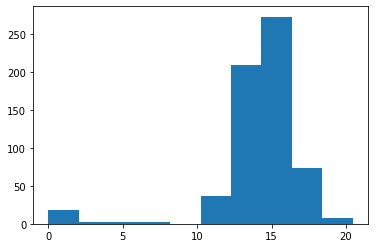

In [9]:
plt.hist(np.array(E_Var_msprime(MSPRIME_data))[:,1]/N)

# 5) Site frequency spectrum

![title](SFS_schema.png)

In [2]:
E = 3
m = 0.01
N = 80000
theta = 5
n_max = n_max_UE(E)

states = states_UE(E)
pop_distr = pop_distr_UE(E,states)
P = make_P_UE(E)

M = (0.5*m)/N*P
pop_size = N*np.array(pop_distr)

100%|██████████| 14/14 [00:00<00:00, 236.43it/s]


In [3]:
n = len(states)
alpha=np.zeros(n)
scenario = 1

if (scenario == 1):
    alpha[states.index('1|3')] += 5
    alpha[states.index('2|2')] += 5
    alpha[states.index('3|1')] += 5
if (scenario == 2):
    alpha[states.index('1|1')] += 1
    alpha[states.index('1|2')] += 1
    alpha[states.index('2|1')] += 1
    alpha[states.index('1|3')] += 1
    alpha[states.index('2|2')] += 1
    alpha[states.index('3|1')] += 1
    alpha[states.index('1|4')] += 1
    alpha[states.index('2|3')] += 1
    alpha[states.index('3|2')] += 1
    alpha[states.index('4|1')] += 1
    alpha[states.index('1|5')] += 1
    alpha[states.index('2|4')] += 1
    alpha[states.index('3|3')] += 1
    alpha[states.index('4|2')] += 1
    alpha[states.index('5|1')] += 1

In [4]:
pop_configs = []
for k in range(n):
    pop_configs.append(msprime.PopulationConfiguration(initial_size=pop_size[k],sample_size=int(alpha[k])))

In [5]:
SFS = make_SFS(N,M,m,alpha,pop_configs,theta=theta,iterations=100,save_as_file=False)

100%|██████████| 100/100 [00:08<00:00, 11.28it/s]


Plot

Text(0.5, 1.0, "['theta,rN', array([5.  , 0.01])]")

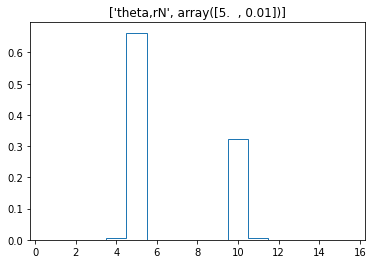

In [6]:
plt.stairs(SFS[1][3:],SFS[0][2:]+0.5)
plt.title(["theta,rN"]+[SFS[1][0:2]])